ERROR: Line magic function `%watermark` not found.



Total number of glucose readings is: 7633

Some of points may be missing glucose readings, the above number represents the collected readings from start to end date

Remove NaN from the mg/dL column... 
Total actual number of glucose readings is: 6092

Remove NaN from the CHO so we can plot the points of meals...
Total number of meal times: 322

Some of the meal times do not have corresponding glucose reading, as it was not recorded at that time.
Thus, total actual number of meal times with glucose readings is: 253

Some of the successive meal readings are redundant and stand for one meal only

Remove redundant readings of same meal...

There are 93  unredundant recorded glucose readings with meal times.

                 Date  mg/dL  CHO (g)
0 2008-07-01 09:43:00   82.0   27.500
1 2008-07-01 12:43:00   54.0   14.500
2 2008-07-01 14:58:00   86.0    7.000
3 2008-07-01 17:58:00   88.0    9.466
4 2008-07-02 08:58:00   99.0   27.500


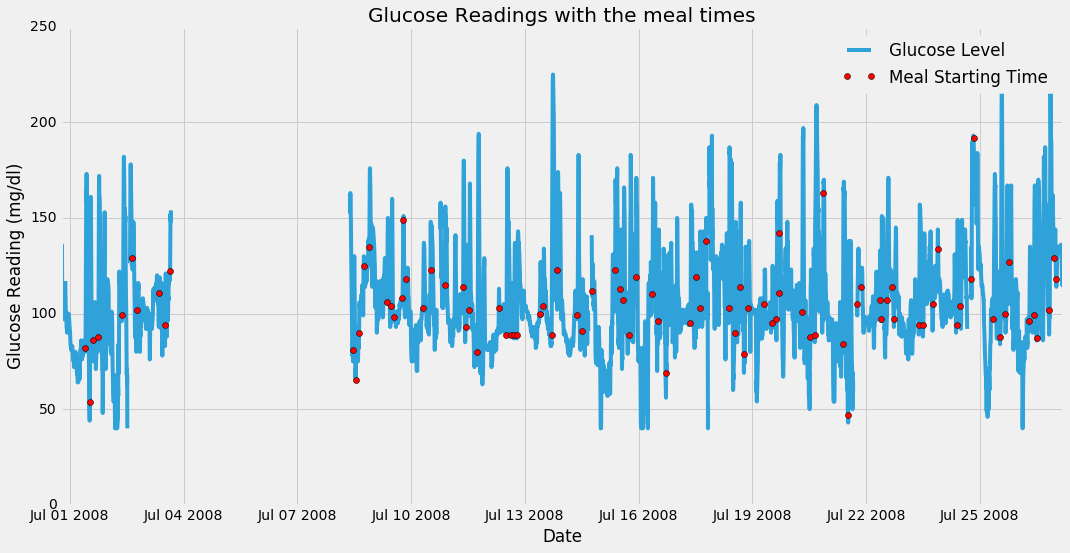

In [2]:
#An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 
#%load_ext watermark 
%watermark -a "Salim Chemlal" -n -t -v 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P1.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df_P1 = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P1 = df_P1.sort(['Date'])

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print "\nTotal number of glucose readings is:", df_P1['mg/dL'].size
print "\nSome of points may be missing glucose readings, the above number represents the collected readings from start to end date"
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P1_wonan_mg = df_P1.dropna(subset=['mg/dL'])
print "\nRemove NaN from the mg/dL column...", "\nTotal actual number of glucose readings is:", df_P1_wonan_mg['mg/dL'].size
###################
#Converting object type to float for all of the dataframe
df_P12= pd.DataFrame(df_P1).convert_objects(convert_numeric=True)
#print df_P12.dtypes
print "\nRemove NaN from the CHO so we can plot the points of meals..."
#Removing NaN from a specific column of the dataframe, here it's CHO. isfinite can work for series, but not for dataframe
df_P12 = df_P12.dropna(subset=['CHO (g)'])
#print "\n", df_P12.head()
print "Total number of meal times:", df_P12['CHO (g)'].size
print "\nSome of the meal times do not have corresponding glucose reading, as it was not recorded at that time."
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P12_wonan_mg = df_P12.dropna(subset=['mg/dL'])
print "Thus, total actual number of meal times with glucose readings is:", df_P12_wonan_mg['mg/dL'].size
print "\nSome of the successive meal readings are redundant and stand for one meal only"
########################
#resetting dataframe index
df_P13 = df_P12_wonan_mg.reset_index(drop=True)
#print df_P13.head()

df_P14 = pd.DataFrame(df_P13)   
#print df_P14.head()

#print_full(df_P14)  

print '\nRemove redundant readings of same meal...\n' 
row = 0
for i, x in enumerate(df_P13['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df_P13['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df_P14.drop(df_P14.index[row], axis=0, inplace=True)
                row = row - 1
#print_full(df_P14)  
                
#resetting dataframe index (1,2,3...)
df_P14 = df_P14.reset_index(drop=True)
print "There are", df_P14['CHO (g)'].size, " unredundant recorded glucose readings with meal times.\n"

print df_P14.head()
#print df_P14

#reindexing the dataframe with the Date column-- This will remove Date column but that is needed for graphing
#df_P14 = df_P14.set_index('Date')

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P1.Date, df_P1['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df_P14.Date, df_P14['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.savefig(fig_path, dpi=_FIG_DPI)


In [3]:
import bisect
#Count number of meals within
incr = 5
print "\nThis patient has a total of", df_P14['CHO (g)'].size, "meals of the following sizes:\n"
cho_max = df_P14['CHO (g)'].max()
#print cho_max
cho_range = [i for i in np.arange(incr, cho_max+incr, incr)]
#print cho_range

count = [0 for x in range(len(cho_range))]

cho_max = df_P14['CHO (g)'].max()

for item in df_P14['CHO (g)']:
    pos = bisect.bisect_left(cho_range, item)
    if pos == len(cho_range):
        print "This value", item, "is out of range"
    else:
        count[pos] += 1
#print count

for i, j in enumerate(cho_range):
    if i == 0:
        print "There are", count[i], "meals with CHO less than", cho_range[i], "grams"
    else:
        print "There are", count[i], "meals with CHO between", cho_range[i-1], "grams and", cho_range[i]

zero_count = 0        
for x in range(df_P14['CHO (g)'].size):
    if df_P14['CHO (g)'][x] <= 1:
        zero_count +=1
        
print "\nThe are",zero_count, "occurrences of meals of size less than 1gram of CHO"
        
print "\nThe mean of the total # of meals is:",df_P14['CHO (g)'].mean()
print "The std of the total # of meals is:",df_P14['CHO (g)'].std()
print "The min meal size is:",df_P14['CHO (g)'].min(), "while the max meal size is:", df_P14['CHO (g)'].max()


This patient has a total of 93 meals of the following sizes:

There are 5 meals with CHO less than 5.0 grams
There are 15 meals with CHO between 5.0 grams and 10.0
There are 17 meals with CHO between 10.0 grams and 15.0
There are 12 meals with CHO between 15.0 grams and 20.0
There are 12 meals with CHO between 20.0 grams and 25.0
There are 23 meals with CHO between 25.0 grams and 30.0
There are 2 meals with CHO between 30.0 grams and 35.0
There are 3 meals with CHO between 35.0 grams and 40.0
There are 1 meals with CHO between 40.0 grams and 45.0
There are 1 meals with CHO between 45.0 grams and 50.0
There are 1 meals with CHO between 50.0 grams and 55.0
There are 1 meals with CHO between 55.0 grams and 60.0

The are 2 occurrences of meals of size less than 1gram of CHO

The mean of the total # of meals is: 19.7145483871
The std of the total # of meals is: 10.7978383253
The min meal size is: 0.5 while the max meal size is: 56.0


In [4]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")

plot = figure(plot_width=1850, plot_height=900, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

s1 = plot.line(df_P1.Date, df_P1['mg/dL'],  line_width=2, line_alpha=0.6)
s2 = plot.square(df_P1.Date, df_P1['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="green")

source = ColumnDataSource(dict(x=df_P14.Date, y=df_P14['mg/dL'], z=df_P14['CHO (g)']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
s3 = plot.add_glyph(source, glyph_1)

plot.add_tools(HoverTool(renderers=[s3], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('Meal Size (grams)', '@z')
]))

# show the results
show(plot)